# <font color='green'>System Analysis</font>
<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2024<br>
Course: Performance Evaluation of Computer Systems<br>
Instructor: Dr. Ahmad Khonsari<br>
</div>

slide 2

# Synopsis of Systems

## Lecture Notes

### Open Models

One of the first tasks in performance modeling is deciding how jobs arrive at the system.
In an open model, jobs arrive at the system at some rate that is independent of system state, and leave when they are done — as illustrated in the Fig.


<center>
<img width="300" src="https://lh3.googleusercontent.com/u/0/drive-viewer/AKGpihYIH-_ui5GYRDMwbSLNxNRxzURPg8s5QuPT15YJ2ZhG2vKvQrYVz1eAAE-A5AHk_9mznPsU5uEFSKfePWWQCLtI3nb7pnG3f84=w1592-h778"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

The input parameter to the model is the arrival rate λ, and performance measures (that are functions of λ) to be determined by the model are:
- Average number of jobs in the system \( N(λ) \)
- Average time in the system \( T(λ) \)
- Utilization, etc.

Note that, in steady state, the throughput \( X \) would just be \( λ \).

#### Open model: jobs arrive independently of system state. Performance measures are functions of \( λ \).
---

## Code Example

In this section, we will use Python to illustrate some of the performance measures mentioned in the lecture. We will simulate an open model system using a simple queueing model and calculate the average number of jobs in the system \( N(λ) \) and the average time in the system \( T(λ) \).



In [ ]:
path='img/1.jpg'

In [7]:
class OpenModel:
    def __init__(self, arrival_rate, service_rate):
        self.arrival_rate = arrival_rate  # λ
        self.service_rate = service_rate  # μ

    def avg_num_jobs(self):
        # N(λ) = λ / (μ - λ)
        return self.arrival_rate / (self.service_rate - self.arrival_rate)

    def avg_time_in_system(self):
        # T(λ) = 1 / (μ - λ)
        return 1 / (self.service_rate - self.arrival_rate)

    def utilization(self):
        # ρ = λ / μ
        return self.arrival_rate / self.service_rate

    def throughput(self):
        # X = λ
        return self.arrival_rate

# Example usage:
model = OpenModel(arrival_rate=10, service_rate=15)
print("Average number of jobs in the system:", model.avg_num_jobs())
print("Average time in the system:", model.avg_time_in_system())
print("System utilization:", model.utilization())
print("Throughput:", model.throughput())


Average number of jobs in the system: 2.0
Average time in the system: 0.2
System utilization: 0.6666666666666666
Throughput: 10


slide 3

# Synopsis of Systems

## Lecture Notes

### Closed Models

In a closed model, the system has \( N \) jobs, and every completed job is immediately replaced by a new job, as illustrated in the Fig. The input parameter \( N \) (sometimes called population size) is thus constant.

<center>
<img width="300" src="https://lh3.google.com/u/0/d/17BrpEXTpzyRlr4ZnXJXG_w61e857ac2H=w1592-h778-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

The performance measures (that are functions of \( N \)) to be determined are:
- Throughput \( X(N) \)
- Average time in the system \( T(N) \)
- Utilization, etc.

#### Closed model: a completing job is immediately replaced by an arriving job. Performance measures are functions of population \( N \).

---

## Code Example

In this section, we will use Python to simulate a closed model system and calculate the performance measures mentioned in the lecture. We will use a simple queueing model to simulate and calculate the average number of jobs in the system \( N \) and the average time in the system \( T(N) \).


In [8]:
class ClosedModel:
    def __init__(self, num_jobs, service_rate):
        self.num_jobs = num_jobs  # N
        self.service_rate = service_rate  # μ

    def throughput(self):
        # X(N) = N / T(N)
        return self.num_jobs / self.avg_time_in_system()

    def avg_time_in_system(self):
        # T(N) = 1 / μ
        return 1 / self.service_rate

    def utilization(self):
        # ρ = X(N) / μ
        return self.throughput() / self.service_rate

# Example usage:
model = ClosedModel(num_jobs=10, service_rate=15)
print("Throughput:", model.throughput())
print("Average time in the system:", model.avg_time_in_system())
print("System utilization:", model.utilization())


Throughput: 150.0
Average time in the system: 0.06666666666666667
System utilization: 10.0


slide 4 , 5


# Synopsis of Systems

## Lecture Notes

### Interactive Models and Input Parameters

The input parameters are the number of users \( N \) — a constant in a closed system — and a think time \( Z \) specified either as an average or with a density distribution (e.g., exponential).

The central metric would be the average response time. Other performance measures include throughput and utilization. Think time is sometimes referred to as sleep time. However, it may be useful to give them different meanings.

For example, consider a closed model for the web surfing behavior of a fixed number of users. In each surfing session, a user may click one hyperlink after another:
- **Think time**: the time between the completion of a download and the next click
- **Sleep time**: the time between the completion of a session and the next session

#### Interactive model: each job is generated by a user, with a think time between a completed job and a new job. Response time is the time a job spends in the box labeled “system.”

---

## Code Example

In this section, we will use Python to simulate an interactive model system, considering both think time and sleep time, and calculate the response times along with other performance measures. We will use a simple queueing model to simulate and calculate the average number of jobs in the system \( N \), average response time \( T(N) \), throughput \( X(N) \), and utilization.




<center>
<img width="300" src="https://lh3.google.com/u/0/d/1zmd-dl5p25uSLDub0tvCGqzvKnEHA2fN=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

#### Interactive model: each job is generated by a user, with a think time between a completed job and a new job. Response time is the time a job spends in the box labeled “system.”

---

## Code Example

In this section, we will use Python to simulate an interactive model system and calculate the response times, which are crucial for human users, along with other performance measures. We will consider the think time between jobs as part of the model.


In [9]:
class InteractiveModel:
    def __init__(self, num_users, service_rate, think_time):
        self.num_users = num_users  # N
        self.service_rate = service_rate  # μ
        self.think_time = think_time  # Z

    def response_time(self):
        # R(N) = 1 / μ + Z
        return 1 / self.service_rate + self.think_time

# Example usage:
model = InteractiveModel(num_users=10, service_rate=15, think_time=5)
print("Response time:", model.response_time())


Response time: 5.066666666666666


In [10]:
class InteractiveModel:
    def __init__(self, num_users, service_rate, think_time, sleep_time):
        self.num_users = num_users  # N
        self.service_rate = service_rate  # μ
        self.think_time = think_time  # Z
        self.sleep_time = sleep_time  # S

    def response_time(self):
        # R(N) = 1 / μ + Z + S
        return 1 / self.service_rate + self.think_time + self.sleep_time

    def throughput(self):
        # X(N) = N / (R(N) + Z)
        return self.num_users / (self.response_time() + self.think_time)

    def utilization(self):
        # ρ = X(N) / μ
        return self.throughput() / self.service_rate

# Example usage:
model = InteractiveModel(num_users=10, service_rate=15, think_time=5, sleep_time=2)
print("Response time:", model.response_time())
print("Throughput:", model.throughput())
print("System utilization:", model.utilization())


Response time: 7.066666666666666
Throughput: 0.8287292817679558
System utilization: 0.055248618784530384


slide 8

## Lecture Notes

### queueing network

a queueing networkis made up for servers


<center>
<img width="300" src="https://lh3.google.com/u/0/d/1tUDdXJi_--7W9PaAOrkDU-htpeCx9C6P=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>



slide 9


# Synopsis of Systems

## Lecture Notes


# Single Server Queue - FCFS

In a single-server network, there are several parameters to consider:

1. **Service Order**: This is the order in which jobs will be served by the server. Unless otherwise stated, we assume First-Come-First-Served (FCFS).

2. **Average Arrival Rate (λ)**: This is the average rate at which jobs arrive to the server. For example, λ could be 3 jobs/sec.

3. **Mean Interarrival Time**: This is the average time between successive job arrivals. It can be calculated as 1/λ. For example, if λ = 3 jobs/sec, then the mean interarrival time would be 1/3 sec.

4. **Size (Service Requirement)**: The "size" of a job is a random variable S. This is the time it would take the job to run on this server if there were no other jobs around (no queueing). In a queueing model, the size (also known as service requirement) is typically associated with the server. For example, this job will take 5 seconds on this server.


In [15]:
import queue
import random

# Parameters
lambda_ = 3  # average arrival rate
mu = 5  # service requirement or job size
mean_interarrival_time = 1/lambda_

# Initialize queue
q = queue.Queue()

# Simulate for 100 time units
for t in range(100):
    # Generate a new job with probability 1/mean_interarrival_time
    if random.random() < 1/mean_interarrival_time:
        q.put(t)

    # If there is a job in the queue and it's service requirement has been met
    if not q.empty() and t - q.queue[0] > mu:
        q.get()

# Print number of jobs left in the queue
print(f"Number of jobs left in the queue: {q.qsize()}")


Number of jobs left in the queue: 6


slide 10 & 11

# Single Server Queue - FCFS

In a single-server network, there are several parameters to consider:

1. **Mean Service Time (E[S])**: This is the expected value of S, namely the average time required to service a job on this CPU, where “service” does not include queueing time. For example, E[S] could be 1/4 sec.

2. **Average Service Rate (μ)**: This is the average rate at which jobs are served. It can be calculated as 1/E[S]. For example, if E[S] = 1/4 sec, then μ would be 4 jobs/sec.

3. **Average Arrival Rate (λ)**: This is the average rate at which jobs arrive to the server. For example, λ could be 3 jobs/sec.

We also consider the following common performance metrics in the context of a single-server system:

1. **Response Time, Turnaround Time, Time in System, or Sojourn Time (T)**: This is calculated as t_depart - t_arrive, where t_depart is the time when the job leaves the system, and t_arrive is the time when the job arrived to the system.

We are interested in the following:

- E[T]: the mean response time
- Var(T): the variance in response time
- P{T > t}: the tail behavior of T



<center>
<img width="300" src="https://lh3.google.com/u/0/d/1tUDdXJi_--7W9PaAOrkDU-htpeCx9C6P=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

Mean response time E[T]: 1.02 seconds
Variance in response time Var(T): 1.18 seconds^2
P{T > 1.0}: 0.36


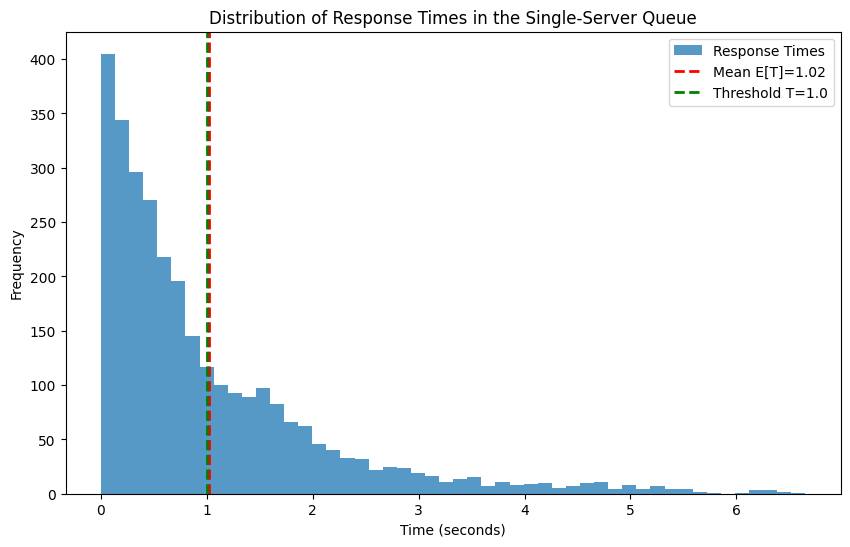

In [29]:

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
arrival_rate = 3  # λ (jobs/sec)
service_rate = 4  # μ (jobs/sec)
mean_service_time = 1 / 4  # E[S]
simulation_time = 1000  # Total simulation time in seconds

# Initialize state variables
arrival_times = np.cumsum(np.random.exponential(1/arrival_rate, int(simulation_time * arrival_rate)))
service_times = np.random.exponential(mean_service_time, len(arrival_times))
start_times = np.zeros_like(arrival_times)
end_times = np.zeros_like(arrival_times)

# Simulate the single-server queue (FCFS)
for i in range(len(arrival_times)):
    if i == 0:
        start_times[i] = arrival_times[i]
    else:
        start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

# Calculate performance measures
response_times = end_times - arrival_times
mean_response_time = np.mean(response_times)
variance_response_time = np.var(response_times)
tail_behavior_threshold = 1.0  # Example threshold for P{T > t}
tail_behavior = np.mean(response_times > tail_behavior_threshold)

# Print results
print(f"Mean response time E[T]: {mean_response_time:.2f} seconds")
print(f"Variance in response time Var(T): {variance_response_time:.2f} seconds^2")
print(f"P{{T > {tail_behavior_threshold}}}: {tail_behavior:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(response_times, bins=50, alpha=0.75, label='Response Times')
plt.axvline(mean_response_time, color='r', linestyle='dashed', linewidth=2, label=f'Mean E[T]={mean_response_time:.2f}')
plt.axvline(tail_behavior_threshold, color='g', linestyle='dashed', linewidth=2, label=f'Threshold T={tail_behavior_threshold}')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times in the Single-Server Queue')
plt.legend()
plt.show()

slide 12
# Single Server Queue - FCFS

## Parameters associated with the single-server network:

- **Waiting Time or Delay (TQ)**: This is the time that the job spends in the queue, not being served. It is also called the "time in queue" or the "wasted time." Under FCFS service order, waiting time can be defined as the time from when a job arrives to the system until it first receives service. Notice that $$E[T] = E[TQ] + E[S]$$.

- **Number of Jobs in the System (N)**: This includes those jobs in the queue, plus the one being served (if any).

- **Number of Jobs in Queue (NQ)**: This is only the number of jobs waiting (in queue).

## Observations about the single-server network:

- As $$\lambda$$, the mean arrival rate, increases, all the performance metrics mentioned earlier increase (get worse).

- As $$\mu$$, the mean service rate, increases, all the performance metrics mentioned earlier decrease (improve).

- We require that $$\lambda \leq \mu$$ (we always assume $$\lambda < \mu$$).




In [32]:
# Define the parameters
lambda_ = 4  # mean arrival rate
mu = 3  # mean service rate

# Check if lambda < mu
if lambda_ >= mu:
    print("The system is unstable. Please ensure that the arrival rate is less than the service rate.")
else:
    # Calculate the performance metrics
    rho = lambda_ / mu  # utilization
    NQ = rho**2 / (1 - rho)  # avg number of jobs in queue
    N = rho + NQ  # avg number of jobs in system
    WQ = NQ / lambda_  # avg waiting time in queue
    W = N / lambda_  # avg waiting time in system

    # Print the results
    print(f"Utilization (rho): {rho}")
    print(f"Average number of jobs in queue (NQ): {NQ}")
    print(f"Average number of jobs in system (N): {N}")
    print(f"Average waiting time in queue (WQ): {WQ}")
    print(f"Average waiting time in system (W): {W}")

The system is unstable. Please ensure that the arrival rate is less than the service rate.


In [31]:
import numpy as np

# Define the parameters
lambda_ = 3  # mean arrival rate
mu = 4  # mean service rate

# Check if lambda < mu
if lambda_ >= mu:
    print("The system is unstable. Please ensure that the arrival rate is less than the service rate.")
else:
    # Calculate the performance metrics
    rho = lambda_ / mu  # utilization
    NQ = rho**2 / (1 - rho)  # avg number of jobs in queue
    N = rho + NQ  # avg number of jobs in system
    WQ = NQ / lambda_  # avg waiting time in queue
    W = N / lambda_  # avg waiting time in system

    # Print the results
    print(f"Utilization (rho): {rho}")
    print(f"Average number of jobs in queue (NQ): {NQ}")
    print(f"Average number of jobs in system (N): {N}")
    print(f"Average waiting time in queue (WQ): {WQ}")
    print(f"Average waiting time in system (W): {W}")


Utilization (rho): 0.75
Average number of jobs in queue (NQ): 2.25
Average number of jobs in system (N): 3.0
Average waiting time in queue (WQ): 0.75
Average waiting time in system (W): 1.0


Single Server Queue-FCFS
Question: If λ > μ what happens?
Answer: If λ > μ the queue length goes to infinity over time.
Question: Can you provide the intuition?
Answer:
let N(t): the number of jobs in the system at time t,
A(t) : the number of arrivals at time t,
D(t): the number of departures at time t,
Consider a large time t, then we have:
E[N(t)] = E[A(t)] − E[D(t)] ≥ λt − μt = t(λ − μ).
(The inequality comes from the fact that the expected number of departures by time t
is actually smaller than μt, because the server is not always busy).
Now observe that if
λ > μ, then t(λ − μ)→∞, as t→∞.
Throughout we assume λ < μ, which is needed for stability (keeping queue sizes from
growing unboundedly).
λ ≥ μ are discussed in Ch 9.

slide 14&15


# Queueing Theory - Deterministic Interarrival and Service Times

## Question:
Given the previous stability condition (λ < μ), suppose that the interarrival distribution and the service time distribution are Deterministic (i.e., both are constants). What is TQ? What is T?

## Answer:
TQ = 0, and T = S.

Queueing (waiting) results from variability in service time and/or interarrival time distributions.

An example of how variability leads to queues:
Let’s discretize time.
Suppose at each time step, an arrival occurs with probability p = 1/6.
Suppose at each time step, a departure occurs with probability q = 1/3.
Then there is a non-zero probability that the queue will build up (temporarily) if several arrivals occur without a departure.

Classification of Queueing Networks
open networks and closed networks.
Stochastic processes books usually limit their discussion
to open networks.
By contrast, the systems performance analysis books almost exclusively discuss closed
networks.

In [37]:
import numpy as np

def simulate_queue(p, q, time_steps):
    np.random.seed(42)  # For reproducibility
    arrivals = np.random.binomial(1, p, time_steps)
    departures = np.random.binomial(1, q, time_steps)

    queue_length = 0
    max_queue_length = 0

    for i in range(time_steps):
        queue_length += arrivals[i] - departures[i]
        if queue_length < 0:
            queue_length = 0
        if queue_length > max_queue_length:
            max_queue_length = queue_length

    return max_queue_length

# Example usage
arrival_probability = 1 / 6
departure_probability = 1 / 3
simulation_time_steps = 1000

max_queue_length = simulate_queue(arrival_probability, departure_probability, simulation_time_steps)
print("Max Queue Length:", max_queue_length)


Max Queue Length: 6


slide 16&17

# Single Server Queue-FCFS

An open queueing network has external arrivals and departures. Below are four examples of open networks.

## Example 1: The Single-Server System

**FCFS (First Come, First Served)**

Arriving jobs have a rate of $$\lambda = 3$$. This is a single-server network.

## Example 2: Network of Queues with Probabilistic Routing

In this network, server *i* receives external arrivals ("outside arrivals") with rate *ri*. Server *i* also receives internal arrivals from some of the other servers. A packet that departs from server *i* is next routed to server *j* with probability *pij*.

The probabilities may depend on the "class" of the packet, so not all packets have to follow the same routing scheme.

### Application

This model can be used for example in modeling packet flows in the Internet: the class of the packet (and hence its route) depends on its source and destination IP addresses.

It can also be used in modeling delays: the transmission time of a wire equals a server with some latency. We would like to calculate the mean round-trip times for packets on a particular route, given the presence of the other packets.

This is a network of queues with probabilistic routing.


<center>
<img width="300" src="https://lh3.google.com/u/0/d/1IqDRC6O4FiBHwPc3HmAlw3WGaU-rk2XY=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>



In [2]:
import queue
import random

# Example 1: Single-Server Queue System
class Server:
    def __init__(self, arrival_rate):
        self.queue = queue.Queue()
        self.arrival_rate = arrival_rate

    def add_job(self, job):
        self.queue.put(job)

    def process_jobs(self):
        while not self.queue.empty():
            job = self.queue.get()
            print(f"Processing job: {job}")

server = Server(arrival_rate=3)
for i in range(10):
    server.add_job(f"Job {i+1}")
server.process_jobs()

# Example 2: Network of Queues with Probabilistic Routing
class Network:
    def __init__(self, num_servers, arrival_rates, routing_matrix):
        self.servers = [Server(arrival_rate) for arrival_rate in arrival_rates]
        self.routing_matrix = routing_matrix

    def route_packet(self, packet, current_server):
        probabilities = self.routing_matrix[current_server]
        next_server = random.choices(range(len(self.servers)), weights=probabilities)[0]
        self.servers[next_server].add_job(packet)

network = Network(num_servers=3, arrival_rates=[3, 2, 1], routing_matrix=[[0.1, 0.6, 0.3], [0.3, 0.1, 0.6], [0.6, 0.3, 0.1]])
for i in range(10):
    network.route_packet(f"Packet {i+1}", current_server=0)
for server in network.servers:
    server.process_jobs()


Processing job: Job 1
Processing job: Job 2
Processing job: Job 3
Processing job: Job 4
Processing job: Job 5
Processing job: Job 6
Processing job: Job 7
Processing job: Job 8
Processing job: Job 9
Processing job: Job 10
Processing job: Packet 7
Processing job: Packet 10
Processing job: Packet 2
Processing job: Packet 3
Processing job: Packet 4
Processing job: Packet 5
Processing job: Packet 6
Processing job: Packet 9
Processing job: Packet 1
Processing job: Packet 8


slide 18

# Example 3: Network of Queues with Non-Probabilistic Routing

In this network, all jobs follow a predetermined route:

**CPU -> Disk 1 -> Disk 2 -> Disk 1 -> Disk 2 -> Disk 1 -> Out**

This is a network of queues with non-probabilistic routing.

<center>
<img width="300" src="https://lh3.google.com/u/0/d/10JrzXS1RnievUz9iGjf4dotLu8RYJN12=w3000-h6492-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

In [3]:
class Server:
    def __init__(self, name):
        self.name = name
        self.queue = queue.Queue()

    def add_job(self, job):
        self.queue.put(job)
        print(f"Job {job} added to {self.name}")

    def process_job(self):
        if not self.queue.empty():
            job = self.queue.get()
            print(f"Processing job {job} in {self.name}")
            return job
        else:
            return None

# Create the servers
cpu = Server("CPU")
disk1 = Server("Disk 1")
disk2 = Server("Disk 2")

# Add jobs to CPU
for i in range(5):
    cpu.add_job(f"Job {i+1}")

# Process jobs in predetermined route
while True:
    job = cpu.process_job()
    if job is None:
        break
    disk1.add_job(job)
    job = disk1.process_job()
    disk2.add_job(job)
    job = disk2.process_job()
    disk1.add_job(job)
    job = disk1.process_job()
    disk2.add_job(job)
    job = disk2.process_job()
    disk1.add_job(job)
    print(f"Job {job} completed")


Job Job 1 added to CPU
Job Job 2 added to CPU
Job Job 3 added to CPU
Job Job 4 added to CPU
Job Job 5 added to CPU
Processing job Job 1 in CPU
Job Job 1 added to Disk 1
Processing job Job 1 in Disk 1
Job Job 1 added to Disk 2
Processing job Job 1 in Disk 2
Job Job 1 added to Disk 1
Processing job Job 1 in Disk 1
Job Job 1 added to Disk 2
Processing job Job 1 in Disk 2
Job Job 1 added to Disk 1
Job Job 1 completed
Processing job Job 2 in CPU
Job Job 2 added to Disk 1
Processing job Job 1 in Disk 1
Job Job 1 added to Disk 2
Processing job Job 1 in Disk 2
Job Job 1 added to Disk 1
Processing job Job 2 in Disk 1
Job Job 2 added to Disk 2
Processing job Job 2 in Disk 2
Job Job 2 added to Disk 1
Job Job 2 completed
Processing job Job 3 in CPU
Job Job 3 added to Disk 1
Processing job Job 1 in Disk 1
Job Job 1 added to Disk 2
Processing job Job 1 in Disk 2
Job Job 1 added to Disk 1
Processing job Job 2 in Disk 1
Job Job 2 added to Disk 2
Processing job Job 2 in Disk 2
Job Job 2 added to Disk 1

slide 19

Example4: Finite Buffer
An example of a single-server network with finite buffer is shown in the Figure. Any
arrival that finds no room is dropped.
Network of queues with non-probabilistic routing.


<center>
<img width="300" src="https://lh3.googleusercontent.com/u/0/drive-viewer/AKGpihZT7Edf6Tg5OZs-r4IFdkocK0Bmow9DWijgzA-NYZKbWYkUwdKbgJaCgliL5AgL5K7V767N7yTCSufD9XESZyZfCBkYFBtqRsI=w1860-h1580-rw-v1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

In [14]:
# Define the buffer capacity and service rate
buffer_capacity = 9
μ =4
service_rate = μ
λ=3
simulation_time=100

class FiniteBuffer:
    def __init__(self, buffer_capacity, arrival_rate, service_rate):
        self.buffer_capacity = buffer_capacity
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.buffer = []
        self.in_service = None
        self.dropped_jobs = 0

    def job_arrival(self):
        if len(self.buffer) < self.buffer_capacity:
            self.buffer.append('job')
        else:
            self.dropped_jobs += 1

    def job_service(self):
        if self.in_service is None and self.buffer:
            self.in_service = self.buffer.pop(0)

    def simulate(self, simulation_time):
        for _ in range(simulation_time):
            self.job_arrival()
            self.job_service()

        print(f'Number of dropped jobs: {self.dropped_jobs}')

# Initialize a finite buffer system
buffer_system = FiniteBuffer(buffer_capacity=9, arrival_rate=λ, service_rate=μ)

# Run the simulation for a certain time
buffer_system.simulate(simulation_time)



Number of dropped jobs: 90


slide 20

# Performance Metrics

We have four performance metrics that can be used to describe the performance of a multi-server, multi-queue system:

1. **E[N]**: The expected number of jobs in the system (both in queue and in service).
2. **E[T]**: The expected time a job spends in the whole system, including all time spent in various queues and time spent receiving service at various servers.
3. **E[NQ]**: The expected number of jobs in the queue.
4. **E[TQ]**: The expected time a job spends waiting in the queue (also known as the "wasted" time).

In a multi-server system, we use index `i` to denote the `i`th queue. For example, **E[Ni]** represents the expected number of jobs both queueing and in service at server `i`, and **E[Ti]** represents the expected time a job spends queueing and in service at server `i`.


slide 21

# More Metrics: Utilization and Throughput

**Device Utilization (ρi)** is the fraction of time device `i` is busy. This definition of utilization applies only to a single device (server). When the device is implied, we simply write ρ (omitting the subscript).

Suppose we watch a device `i` for a long period of time. Let:
- **τ**: the length of the observation period.
- **B**: the total time during the observation period that the device is non-idle (busy).

Then, the device utilization is given by:


$ρi = \frac{B}{τ}$


In [21]:
class Device:
    def __init__(self):
        self.busy_time = 0
        self.total_time = 0

    def start_busy_period(self, duration):
        self.busy_time += duration

    def increment_total_time(self, increment):
        self.total_time += increment

    def calculate_utilization(self):
        return self.busy_time / self.total_time if self.total_time > 0 else 0

# Initialize a device
device = Device()
busy_duration=10
total_duration=20
# Simulate a busy period and total time
device.start_busy_period(busy_duration)
device.increment_total_time(total_duration)

# Calculate and print the device utilization
utilization = device.calculate_utilization()
print(f'Device Utilization: {utilization}')


Device Utilization: 0.5


slide 22

# More Metrics: Throughput and Utilization

**Throughput** is a widely used performance metric. It's the rate at which a system can process jobs. Higher throughput is generally desirable as it means the system can handle more jobs in a given time period.

The relationship between maximizing throughput and minimizing response time can be complex. In general, a system with higher throughput can process more jobs in a given time, which could lead to lower response times. However, this isn't always the case. For example, if a system is optimized for throughput, it might process jobs in large batches, which could increase the response time for individual jobs. The specific relationship between throughput and response time can depend on many factors, including the system's architecture and workload.

As for the question about which system has higher throughput in the figure, it's hard to say without seeing the figure. But we can compare the throughput of two systems using the given arrival rates (λ) and service rates (μ).

<center>
<img width="300" src="https://lh3.google.com/u/0/d/193DBtPFISja3f02vvV6-oEmh1sbAq_9j=w2720-h1580-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

Let's consider two systems:

1. System 1: λ = 1/6, μ = 1/3
2. System 2: λ = 1/6, μ = 1/5

The throughput of a system is generally determined by the minimum of the arrival rate (λ) and the service rate (μ). So, for both systems, the throughput would be λ = 1/6, since the arrival rate is the limiting factor.

However, the utilization of the systems, which is the ratio of the arrival rate to the service rate (ρ = λ/μ), would be different. For System 1, the utilization would be (1/6) / (1/3) = 0.5, and for System 2, the utilization would be (1/6) / (1/5) = 0.833. This means System 2 is busier compared to System 1.


In [22]:
class System:
    def __init__(self, arrival_rate, service_rate):
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate

    def calculate_throughput(self):
        return min(self.arrival_rate, self.service_rate)

    def calculate_utilization(self):
        return self.arrival_rate / self.service_rate if self.service_rate > 0 else 0

# Initialize two systems
system1 = System(arrival_rate=1/6, service_rate=1/3)
system2 = System(arrival_rate=1/6, service_rate=1/5)

# Calculate and print the throughput and utilization for both systems
for i, system in enumerate([system1, system2], start=1):
    throughput = system.calculate_throughput()
    utilization = system.calculate_utilization()
    print(f'System {i} - Throughput: {throughput}, Utilization: {utilization}')


System 1 - Throughput: 0.16666666666666666, Utilization: 0.5
System 2 - Throughput: 0.16666666666666666, Utilization: 0.8333333333333333


slide 23

# More Metrics: Throughput and Utilization

Device Throughput ($Xi$): the rate of completions at device i (e.g., jobs/sec). The throughput ($X$) of the system is the rate of job completions in the system.

Let $C$ denote the total number of jobs completed at device i during time $\tau$. Then, $Xi = \frac{C}{\tau}$.

So how does $Xi$ relate to $\rho_i$? Well, let's find out.

Question: what is $C_B$?
Answer: $B_C = \frac{\text{total time that device is non−idle during time } \tau}{\text{total number of jobs completed during time } \tau} = E[S]$.

So $C_B = \frac{1}{E[S]} = \mu_i$

So we have: $Xi = \mu_i \rho_i$


In [40]:
# Define the parameters
mu_i = 1  # mean service rate
rho = 0.5  # utilization

# Calculate the throughput
X_i = mu_i * rho

# Print the result
print(f"Throughput (X_i): {X_i}")


Throughput (X_i): 0.5


slide 24

# More Metrics: Throughput and Utilization

Another way to derive this expression by conditioning:

$Xi = \text{Mean rate of completion at server } i$

This can be expressed as:

$Xi = E[\text{Rate of completion at server } i | \text{server } i \text{ is busy}] \cdot P\{\text{server } i \text{ is busy}\} + E[\text{Rate of completion at server } i | \text{server } i \text{ is idle}] \cdot P\{\text{server } i \text{ is idle}\}$

Simplifying this gives us:

$Xi = \mu_i \cdot P\{\text{server } i \text{ is busy}\} + 0 = \mu_i \cdot \rho_i$

Or, equivalently,

$\rho_i = Xi \cdot E[S]$

This is known as the Utilization Law.


In [42]:
# Define the parameters
mu_i = 4  # mean service rate
rho = 0.5  # utilization

# Calculate the throughput
X_i = mu_i * rho

# Print the result
print(f"Throughput (X_i): {X_i}")

# Calculate the utilization
rho_i = X_i / mu_i

# Print the result
print(f"Utilization (rho_i): {rho_i}")


Throughput (X_i): 2.0
Utilization (rho_i): 0.5


slide 25
# Question: What is X?

X is defined as the product of ρ and μ, i.e., X = ρ · μ. But what is ρ? We can prove that ρ = λ/μ.

This is an intuitive way to see this, but not a proof!!

ρ is the fraction of time the server is busy in a single-server model.

Let's assume λ=1/6 (which represents the average time between arrivals) and FCFS (First Come First Serve) as the service discipline.

The average service time required by a job is 1/μ and the average time between arrivals is 1/λ.

So, we can express ρ as λ/μ.

This leaves us with X = ρ · μ = λ/μ · μ = λ.

So, the throughput does not depend on the service rate whatsoever!


In [26]:
# Let's define the variables
lambda_ = 1/6  # average time between arrivals
mu = 1/3  # service rate

# Calculate rho
rho = lambda_ / mu

# Calculate X
X = rho * mu

print(f"rho: {rho}")
print(f"X: {X}")


rho: 0.5
X: 0.16666666666666666


slide 26

# More Metrics: Throughput and Utilization

Consider two systems, both having the same throughput of 1/6 jobs/sec. In the case of the faster processor, the response time drops and the queue length drops, but X (throughput) does not change. Therefore, lower response time is not related to higher throughput.

Now, let's consider two systems with different values of μ (service rate). The throughput, X, is the same in both systems. Let's assume λ (arrival rate) = 1/6 for both systems.

# Question: Explain why X does not change.

The throughput X does not change because, irrespective of the value of μ, the completion rate is still bounded by the arrival rate: “rate in = rate out.” Changing μ affects the maximum possible X, but not the actual X. This is because we assume a stable system, then, for large t, the number of arrivals during t is approximately the number of completions during t.


<center>
<img width="300" src="https://lh3.google.com/u/0/d/19RELFwJrg6chbiZohRvvkfOXJ6tiZjFg=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

In [27]:
# Let's define the variables for the two systems
lambda_1 = 1/6  # average time between arrivals for system 1
mu_1 = 1/3  # service rate for system 1

lambda_2 = 1/6  # average time between arrivals for system 2
mu_2 = 1/5  # service rate for system 2

# Calculate X for both systems
X_1 = min(lambda_1, mu_1)
X_2 = min(lambda_2, mu_2)

print(f"X for system 1: {X_1}")
print(f"X for system 2: {X_2}")


X for system 1: 0.16666666666666666
X for system 2: 0.16666666666666666


slide 27

# More Metrics: Throughput and Utilization

## Example: Probabilistic Network of Queues: What is the Throughput?

Let $r_i$ be the average outside arrival rate into server $i$, and $\mu_i$ be the average service rate at server $i$.

### Question: What is the system throughput, $X$, in the Figure?

**Answer**: $X = \sum_i r_i$.

### Question: What is the throughput at server $i$, $X_i$?

**Answer**: Let $\lambda_i$ denote the total arrival rate into server $i$. Then $X_i = \lambda_i$. But to get $\lambda_i$ we need to solve the following simultaneous equations:

$$\lambda_i = r_i + \sum_j \lambda_j P_{ji}$$

### Question: How are the $r_i$’s constrained in these equations?

**Answer**: For the network to reach “equilibrium” (flow into server = flow out of server), we must have $\lambda_i < \mu_i$, ∀ $i$, and this constrains the $r_i$’s.



<center>
<img width="300" src="https://lh3.google.com/u/0/d/1IqDRC6O4FiBHwPc3HmAlw3WGaU-rk2XY=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>


In [44]:
import numpy as np

def solve_lambda(r, P):

    n = len(r)
    lambda_old = np.zeros(n)
    lambda_new = r.copy()

    while not np.allclose(lambda_old, lambda_new):
        lambda_old = lambda_new.copy()
        lambda_new = r + np.dot(P.T, lambda_old)

    return lambda_new

def calculate_throughput(r, mu, P):

    lambda_values = solve_lambda(r, P)
    sigma = lambda_values / mu

    X = np.sum(r * sigma)
    Xi = lambda_values

    return X, Xi

def check_equilibrium(r, mu):

    for i in range(len(r)):
        if r[i] >= mu[i]:
            print(f"Server {i} violates the equilibrium condition: r{i} >= mu{i}")
            return False
    return True

# Example usage
r = np.array([0.2, 0.3, 0.1])  # Average outside arrival rates
mu = np.array([0.5, 0.6, 0.4])  # Average service rates
P = np.array([[0.0, 0.3, 0.7],  # Transition probability matrix
              [0.2, 0.0, 0.8],
              [0.5, 0.5, 0.0]])

if check_equilibrium(r, mu):
    X, Xi = calculate_throughput(r, mu, P)
    print(f"System throughput X: {X}")
    print(f"Throughput at each server Xi: {Xi}")
else:
    print("Network cannot reach equilibrium with the given parameters.")

System throughput X: 21918.048614490173
Throughput at each server Xi: [16438.52824169 17808.47751297 25753.59424531]


# More Metrics: Throughput and Utilization

## Example: Network of Queues with Non-Probabilistic Routing: What is the Throughput?

# Question: What is X in the Figure?

The throughput of the system, denoted as X, is equal to the arrival rate λ, i.e., X = λ.

# Question: What are XDisk1 and XDisk2?

The throughput at Disk 1 and Disk 2, denoted as XDisk1 and XDisk2 respectively, are given by:

- XDisk1 = 3λ
- XDisk2 = 2λ


<center>
<img width="300" src="https://lh3.google.com/u/0/d/10JrzXS1RnievUz9iGjf4dotLu8RYJN12=w3000-h6492-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

In [45]:
# Let's define the variables for the system
# Note: Replace these values with your actual values
lambda_ = 1  # arrival rate

# Calculate X, XDisk1, and XDisk2
X = lambda_
XDisk1 = 3 * lambda_
XDisk2 = 2 * lambda_

print(f"X: {X}")
print(f"XDisk1: {XDisk1}")
print(f"XDisk2: {XDisk2}")


X: 1
XDisk1: 3
XDisk2: 2


# More Metrics: Throughput and Utilization

## Example: Finite Buffer: What is the Throughput?

In the given system, the outside arrival rate is denoted as `λ` and the service rate is denoted as `μ`.

# Question: What is X?

The throughput of the system, denoted as `X`, is given by the product of `ρ` and `μ`, i.e., X = ρμ.

However, we need stochastic analysis to determine `ρ` because it is no longer simply `λ/μ`.

Observe that `X` is less than `λ` because some arrivals get dropped when the buffer is full. In the given figure, the CPU has space for 9 jobs plus 1 in service.


In [46]:
# Let's define the variables for the system
# Note: Replace these values with your actual values
lambda_ = 1  # arrival rate
mu = 2  # service rate

# Calculate rho
# Note: This is a placeholder value. You'll need to perform a stochastic analysis to find the actual value of rho.
rho = lambda_ / mu

# Calculate X
X = rho * mu

print(f"X: {X}")


X: 1.0


slide 31 & 32


# Closed Networks

Closed queueing networks have no external arrivals or departures. There are two types of closed networks:

1. **Interactive (terminal-driven)**
2. **Batch system**

## Interactive (Terminal-Driven) Systems

In an interactive system, terminals (users) send a job to the "central subsystem" and then wait for a response. The central subsystem is a network of queues. A user cannot submit her next job before her previous job returns. Thus, the number of jobs (also known as load or MPL - multiprogramming level) in the system is fixed (equal to the number of terminals).

It's important to note that the load (MPL) should not be confused with device utilization.

In an interactive system, `Z` (Think time) is a random variable that denotes the time at each terminal between receiving the result of one job and sending out the next job.

Note: the number of jobs in the central subsystem is at most the number of terminals, because some users might be in the "thinking" state.


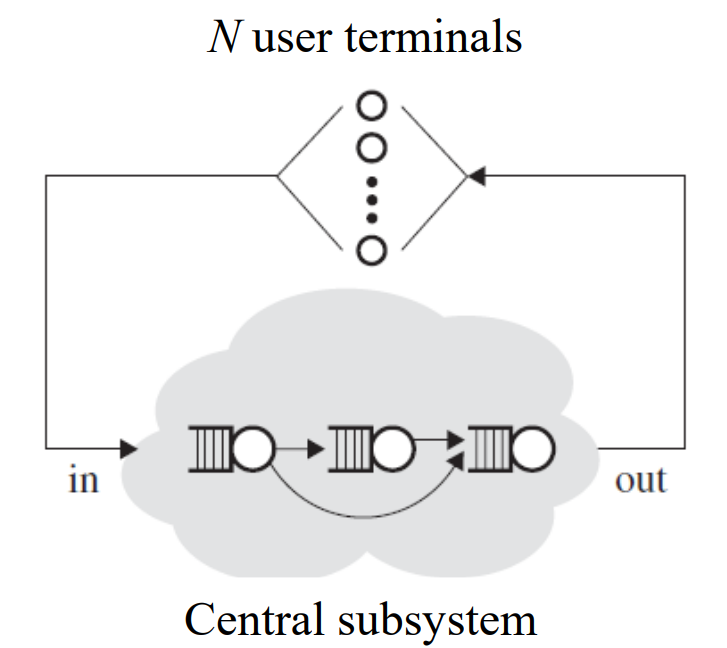

# Closed Networks: Interactive (Terminal-Driven) Systems

## Example: Form Submission System

Consider a system with `N` users, each at a terminal filling out a form with many fields. Once all fields are filled out, the screen is submitted to the central subsystem for update. A new screen cannot be filled out until the previous update is performed.

The "think time," denoted as `Z`, is the time to key data to the screen. The user (terminal) alternates between thinking and waiting for the submitted job to return.

In this system, the number of jobs in the system is fixed and equal to the number of terminals. This is a characteristic of a closed, interactive (terminal-driven) system.



<center>
<img width="300" src="https://lh3.google.com/u/0/d/1LgZgdhis6yDCNR3QHLct26P_lxJN88hY=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

In [48]:
import time
import random

# Define the number of users (terminals)
N = 10

# Define the "think time" (time to fill out the form) as a random value between 1 and 3 seconds
Z = [random.randint(1, 3) for _ in range(N)]

# Define the processing time at the central subsystem as a random value between 1 and 2 seconds
processing_time = random.randint(1, 2)

# Simulation of the system
for i in range(N):
    # User fills out the form
    print(f"User {i+1} is filling out the form...")
    time.sleep(Z[i])  # Wait for the "think time"

    # User submits the form to the central subsystem
    print(f"User {i+1}'s form is being processed by the central subsystem...")
    time.sleep(processing_time)  # Wait for the processing time

    # User receives the response and can submit a new form
    print(f"User {i+1} has received the response and can submit a new form.\n")

print("All forms have been processed.")


User 1 is filling out the form...
User 1's form is being processed by the central subsystem...
User 1 has received the response and can submit a new form.

User 2 is filling out the form...
User 2's form is being processed by the central subsystem...
User 2 has received the response and can submit a new form.

User 3 is filling out the form...
User 3's form is being processed by the central subsystem...
User 3 has received the response and can submit a new form.

User 4 is filling out the form...
User 4's form is being processed by the central subsystem...
User 4 has received the response and can submit a new form.

User 5 is filling out the form...
User 5's form is being processed by the central subsystem...
User 5 has received the response and can submit a new form.

User 6 is filling out the form...
User 6's form is being processed by the central subsystem...
User 6 has received the response and can submit a new form.

User 7 is filling out the form...
User 7's form is being process

# Closed Networks: Interactive (Terminal-Driven) Systems

## Response Time

The **response time** for an interactive system is defined as the time it takes a job to go from "in" (when it is submitted) to "out" (when the response is received).

In mathematical notation, the expected response time is denoted as E[R], which represents the average time to get from "in" to "out".

However, the expected system time, denoted as E[T], is different from E[R]. It is defined as the sum of the expected response time and the expected "think time" (the time a user spends thinking before submitting the next job), denoted as E[Z]. In other words,

$$ E[T] = E[R] + E[Z] $$

It's important to note that in open systems, T (the "response time") is a random variable, and is given by the sum of the expected queue time (E[TQ]) and the expected service time (E[S]). In other words,

$$ E[T] = E[TQ] + E[S] $$

However, in closed interactive systems, R is referred to as the response time, and we refer to T as the system time (or "time in system").


In [49]:
def calculate_system_time(E_R, E_Z):

    E_T = E_R + E_Z
    return E_T

# Example usage:
E_R = 10  # Expected response time
E_Z = 5   # Expected "think time"

E_T = calculate_system_time(E_R, E_Z)
print(f"The expected system time E[T] is {E_T}")


The expected system time E[T] is 15


slide 34
# Closed Networks: Interactive (Terminal-Driven) Systems

The goal of these systems is to **maximize the number of users**, while keeping their expected response time `E[R]` low.

Note that interactive systems are very different from open systems in that a small change in `N` (the number of users) has a profound effect on the system behavior.

The typical questions asked by systems designers are:

1. Given the original system, what is the maximum `N` such that `E[R]` stays below some threshold? That is, how does `E[R]` rise with `N`?
2. Assume a fixed multiprogramming level, `N`. Given that we can make changes to the central subsystem (i.e., make certain devices faster), which changes will improve `E[R]` the most?


slide 35

# Closed Networks: Interactive (Terminal-Driven) Systems

## Modeling Performance of a Website

**Question**: Is a website modeled as a closed interactive system or an open system?

**Answer**: There are research papers of both types.

### Closed System Model
In a **closed system model**, once a user clicks on a link (submits a job), he typically waits to receive the result before clicking on another link.

### Open System Model
In an **open system model**, a website may have a huge number of users, each of whom is very transient in his or her use of the website.

### Partly-Open System
There is also a **"partly-open" system** model where users arrive from outside as in an open system, but make `k` requests to the system when they arrive, where each request can only be made when the previous request completes (as in a closed system).


<center>
<img width="300" src="https://lh3.google.com/u/0/d/11JpzAfC9OPtV8Hr5uCaIcpSn-HvnlBPh=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

# Closed Networks: Batch Systems

The **goal** of batch systems is to obtain high throughput, so that as many jobs as possible are completed overnight.

The typical question asked by systems designers is:
“How can we improve the central subsystem so as to maximize throughput?”

We are typically constrained by some fixed maximum Multiprogramming Level (MPL) (because only so many jobs fit into memory or for some other reason). The only method to increase throughput is changing the central subsystem, either by changing the routing or by speeding up some device.

**Observation**: In the batch system, we are not concerned with response times because the jobs are running overnight.

**Question**: What does X mean in a closed system?

**Answer**: X is the number of jobs crossing “out” per second. Note that “in” equals “out” for the batch system.


slide 38


# Throughput in a Closed System

## Example: Single Server

Consider a closed network consisting of a single server.

**Question**: What is the throughput, X, in the Figure?

**Answer**: The throughput, X, is equal to the service rate, μ. This is very different from the case of the open network where throughput was independent of service rate!

The Multiprogramming Level (MPL) is equal to the number of jobs, N.

## Single-server closed network

**Question**: What is the mean response time, E[R], in the Figure?

**Answer**: For a closed batch system, the mean response time E[R] is equal to the mean time in system E[T], i.e., the response time and time in system are the same. In this figure, E[T] = N/μ, because every "arrival" waits behind N − 1 jobs and then runs.

Note that X and E[R] are inversely related! Specifically, X = μ and E[R] = E[T] is proportional to N/μ.


<center>
<img width="300" src="https://lh3.google.com/u/0/d/1wNmgSkH0JTjNxTyESZJnjXgTm2M1judR=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>



In [1]:
def calculate_throughput(service_rate):
    """
    Function to calculate the throughput X in a single-server closed network.
    X = μ (service rate)

    Parameters:
    service_rate (float): Service rate μ

    Returns:
    X (float): Throughput
    """
    X = service_rate
    return X

def calculate_response_time(N, service_rate):
    """
    Function to calculate the mean response time E[R] in a single-server closed network.
    E[R] = E[T] = N/μ

    Parameters:
    N (int): Number of jobs
    service_rate (float): Service rate μ

    Returns:
    E_R (float): Mean response time
    """
    E_R = N / service_rate
    return E_R

# Example usage:
N = 10  # Number of jobs
μ = 2   # Service rate

X = calculate_throughput(μ)
E_R = calculate_response_time(N, μ)

print(f"The throughput X is {X}")
print(f"The mean response time E[R] is {E_R}")


The throughput X is 2
The mean response time E[R] is 5.0


# Throughput in a Closed System

## Example: Tandem Servers

Consider a closed network consisting of tandem servers. The Multiprogramming Level (MPL) is equal to the number of jobs, N.

**Question**: What happens when N = 2? Now it appears that there is always at least one job at the slow server, doesn’t it?

**Answer**: No, the slower server is still not always busy. Sometimes the slow server is faster than the fast server – since service rates are just averages! So, we do in fact need to take the job size distribution into account to get the exact answer. The job size distribution can really affect the answer.

**Question**: What is the throughput?

**Answer**: We may say X = min(μ1, μ2)...

**Question**: Why is this previous answer not necessarily correct?

**Answer**: The previous answer is correct if we know that the slower server is always busy, but that is not necessarily the case. Imagine N = 1. Then it is certainly not the case that the slower server is always busy.


<center>
<img width="300" src="https://lh3.google.com/u/0/d/15KvsvHyIYSaRSQzSdQAr06zyTTqhrDFE=w1860-h1548-iv1"  alt="Displaying 1.jpg" aria-hidden="true">
</center>

In [2]:
def calculate_throughput(service_rate1, service_rate2, N):
    """
    Function to calculate the throughput X in a tandem servers closed network.

    Parameters:
    service_rate1 (float): Service rate μ1 of the first server
    service_rate2 (float): Service rate μ2 of the second server
    N (int): Number of jobs

    Returns:
    X (float): Throughput
    """
    if N == 1:
        X = min(service_rate1, service_rate2)
    else:
        X = service_rate1 if service_rate1 < service_rate2 else service_rate2
    return X

# Example usage:
μ1 = 10  # Service rate of the first server
μ2 = 5   # Service rate of the second server
N = 2    # Number of jobs

X = calculate_throughput(μ1, μ2, N)
print(f"The throughput X is {X}")


The throughput X is 5
